
# Technical Test: Python and SQLAlchemy Proficiency

## Objective

This test is designed to assess your proficiency in Python programming and your understanding of Object-Relational Mapping (ORM) using SQLAlchemy. You will interact with a small database application in a Jupyter Notebook environment, showcasing your ability to manage and manipulate data effectively.

## Test Environment

The test will be conducted in a Jupyter Notebook hosted on GitHub. All necessary libraries, including SQLAlchemy, are pre-installed, and the environment is set up for you. You will work on a fork of the provided repository.

## Test Overview

You will complete a series of tasks that involve interacting with a small database application using Python and SQLAlchemy. The test will evaluate your ability to:

1. **Implement ORM Models**: Create Python classes that map to database tables using SQLAlchemy ORM, including fields, relationships, and constraints.

2. **Perform CRUD Operations**: Write Python code to perform Create, Read, Update, and Delete operations on the database using SQLAlchemy.

3. **Query Optimization**: Demonstrate your ability to write efficient queries, utilizing SQLAlchemy features to optimize database access.

4. **Handle Transactions**: Implement transaction management to ensure data integrity during complex operations.

5. **Documentation and Code Quality**: Provide clear documentation and adhere to best practices in code structure and style.

## Instructions

1. **Fork the Repository**: Start by forking the provided GitHub repository to your own account.

2. **Access the Jupyter Notebook**: Open the Jupyter Notebook in your forked repository to begin the test.

3. **Complete the Tasks**: Follow the instructions in the notebook to complete each task. Ensure your code is functional and meets the specified requirements.

4. **Use SQLAlchemy Documentation**: Refer to the [SQLAlchemy documentation](https://docs.sqlalchemy.org) as needed to assist with your implementation.

5. **Commit Your Changes**: Once you have completed the tasks, commit your changes to your forked repository.

6. **Submit Your Test**: Notify us by providing a link to your forked repository with your completed test.

## Evaluation Criteria

-  **Correctness**: The solution should meet all specified requirements and perform all operations correctly.
-  **Code Quality**: Code should be clean, well-organized, and follow Python best practices.
-  **Efficiency**: Solutions should be optimized for performance, especially in the context of database operations.
-  **Problem Solving**: Demonstrated ability to effectively solve problems and make sound design decisions.
-  **Documentation**: Clear and concise documentation that helps reviewers understand your approach and implementation.

We look forward to reviewing your work and assessing your potential to contribute to our development team.

In [2]:
import models as m
import sqlalchemy as sa

# First, let's connect to the database
engine = sa.create_engine("sqlite:///quiz.db")
SessionMaker = sa.orm.sessionmaker(autocommit=False, autoflush=False, bind=engine)
session = SessionMaker()

In [4]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

In [3]:
# example query sites
sites_query = sa.select(m.Site).limit(10)
sites = list(session.execute(sites_query).scalars())
print(sites)

[<Site n°1 - GigaWatt Llama Ranch>, <Site n°2 - Sunny Side of the Moon>, <Site n°3 - River Dance Powerhouse>, <Site n°4 - Turbine Nation Offshore>, <Site n°5 - Sunshine & Chill Canopy>, <Site n°6 - Watts in the Attic>, <Site n°7 - Flow like a River>, <Site n°8 - Juicy Biomass Co-op>, <Site n°9 - Offshore Avengers>, <Site n°10 - Trash into Cash>]


### Question 1 :

Based on all the sites in the db, make a summary of the modelled data. Please choose the best metrics to display and best grouping to do. (count, sum on some attribute grouped by another attribute etc...)

In [4]:
# Code here
#print the database:
inspector = sa.inspect(engine)

# 1. Print all table names
tables = inspector.get_table_names()
print("Tables:", tables)

# 2. Show columns and preview data for each table
for table_name in tables:
    print(f"\nTable: {table_name}")
    
    # Print column names
    columns = inspector.get_columns(table_name)
    column_names = [col["name"] for col in columns]
    print("Columns:", column_names)

    # Preview first few rows using `text` for raw SQL
    with engine.connect() as conn:
        result = conn.execute(sa.text(f"SELECT * FROM {table_name} LIMIT 5")).fetchall()
        for row in result:
            print(row)


Tables: ['contracts', 'invoices', 'sites', 'timeseries_records']

Table: contracts
Columns: ['id', 'purchase_order', 'start_date', 'end_date', 'site_id', 'price', 'invoicing_frequency']
(1, 'PO-6713-1', '2021-06-09', '2041-06-03', 1, 511.0, 'Monthly')
(2, 'PO-9051-2', '2022-12-14', '2042-06-09', 2, 524.0, 'Monthly')
(3, 'PO-8400-3', '2021-07-11', '2036-01-17', 3, 509.0, 'Quarterly')
(4, 'PO-7646-4', '2022-04-14', '2052-07-01', 4, 381.0, 'Quarterly')
(5, 'PO-7238-5', '2021-09-18', '2041-05-28', 5, 385.0, 'Quarterly')

Table: invoices
Columns: ['id', 'start_date', 'end_date', 'publication_id', 'amount', 'amount_unit', 'status', 'contract_id']
(1, '2023-01-01', '2023-02-01', 'INV-2587-1', 41611752.0, 'kEUR', 'paid', 14)
(2, '2023-07-01', '2023-08-01', 'INV-4119-2', 39698568000.0, 'EUR', 'paid', 14)
(3, '2024-01-01', '2024-02-01', 'INV-4822-3', 32045832.0, 'kEUR', 'paid', 14)
(4, '2023-01-01', '2023-02-01', 'INV-1009-4', 76254048.0, 'kEUR', 'paid', 15)
(5, '2023-04-01', '2023-05-01', 'INV-

In [ ]:
#1st metric is the total amount based on the status of the invoiceb
with engine.connect() as conn:
        result = conn.execute(sa.text(f"SELECT SUM(amount), status, amount_unit FROM  invoices GROUP BY status, amount_unit ")).fetchall()
        print(result)
        df_amount = pd.DataFrame(result)

[(32364140.0, 'draft', 'EUR'), (61577349.0, 'draft', 'kEUR'), (22773143.0, 'error', 'EUR'), (12434912784.0, 'error', 'kEUR'), (39914650092.0, 'paid', 'EUR'), (574668789.0, 'paid', 'kEUR'), (113362078.0, 'published', 'EUR'), (105512447.0, 'published', 'kEUR')]


In [53]:
df_amount

,SUM(amount),status,amount_unit
0,3.236414e+07,draft,EUR
1,6.157735e+07,draft,kEUR
2,2.277314e+07,error,EUR
3,1.243491e+10,error,kEUR
4,3.991465e+10,paid,EUR
5,5.746688e+08,paid,kEUR
6,1.133621e+08,published,EUR
7,1.055124e+08,published,kEUR


In [55]:
#2nd metric is the average capacity based on the technp
with engine.connect() as conn:
        result = conn.execute(sa.text(f"SELECT AVG(capacity), techno FROM  sites GROUP BY techno ")).fetchall()
        print(result)
        df_capacity = pd.DataFrame(result)

[(26062.5, 'cogeneration_biomass'), (25333.333333333332, 'cogeneration_other'), (11666.666666666666, 'cogeneration_waste'), (27375.0, 'hydro_turbine_pumped_storage'), (23125.0, 'hydro_turbine_reservoir'), (24428.571428571428, 'hydro_turbine_run_of_river'), (6610.0, 'solar_field_canopy'), (23227.272727272728, 'solar_field_ground_mounted'), (15751.583333333334, 'solar_field_rooftop'), (68166.66666666667, 'wind_turbine_offshore'), (41878.57142857143, 'wind_turbine_onshore')]


In [56]:
df_capacity

,AVG(capacity),techno
0,26062.500000,cogeneration_biomass
1,25333.333333,cogeneration_other
2,11666.666667,cogeneration_waste
3,27375.000000,hydro_turbine_pumped_storage
4,23125.000000,hydro_turbine_reservoir
5,24428.571429,hydro_turbine_run_of_river
6,6610.000000,solar_field_canopy
7,23227.272727,solar_field_ground_mounted
8,15751.583333,solar_field_rooftop
9,68166.666667,wind_turbine_offshore


In [9]:
#third metric is the actual paid money

with engine.connect() as conn:
    # Fetch contract price and adjusted invoice amounts, converting all to the same unit (EUR)
    result = conn.execute(sa.text("""
        SELECT C.id AS contract_id, C.price*1000 AS contract_price,
               CASE 
                   WHEN I.amount_unit = 'kEUR' THEN I.amount * 1000
                   ELSE I.amount
               END AS invoice_amount
        FROM contracts AS C
        JOIN invoices AS I ON C.id = I.contract_id
        WHERE I.status = 'paid'
    """)).fetchall()
    
    # Convert the result to a DataFrame
    df = pd.DataFrame(result, columns=['contract_id', 'contract_price', 'invoice_amount'])
    df["cashflow"] = df["contract_price"] - df['invoice_amount']

print(df)


    contract_id  contract_price  invoice_amount      cashflow
0            14         39000.0    4.161175e+10 -4.161171e+10
1            14         39000.0    3.969857e+10 -3.969853e+10
2            14         39000.0    3.204583e+10 -3.204579e+10
3            15        465000.0    7.625405e+10 -7.625358e+10
4            15        465000.0    8.383057e+10 -8.383011e+10
5            15        465000.0    7.852700e+10 -7.852654e+10
6            15        465000.0    8.676342e+10 -8.676296e+10
7            15        465000.0    9.744388e+10 -9.744341e+10
8            15        465000.0    5.376888e+10 -5.376842e+10
9            16        791000.0    9.634791e+06 -8.843791e+06
10           16        791000.0    1.467116e+07 -1.388016e+07
11           16        791000.0    2.036444e+07 -1.957344e+07
12           16        791000.0    2.014547e+07 -1.935447e+07
13           16        791000.0    2.316729e+07 -2.237629e+07
14           16        791000.0    2.386801e+07 -2.307701e+07
15      

### Question 2: 
Could you plot a map and tell in which coutries are all the sites ? 
Is there any pb with a site ?

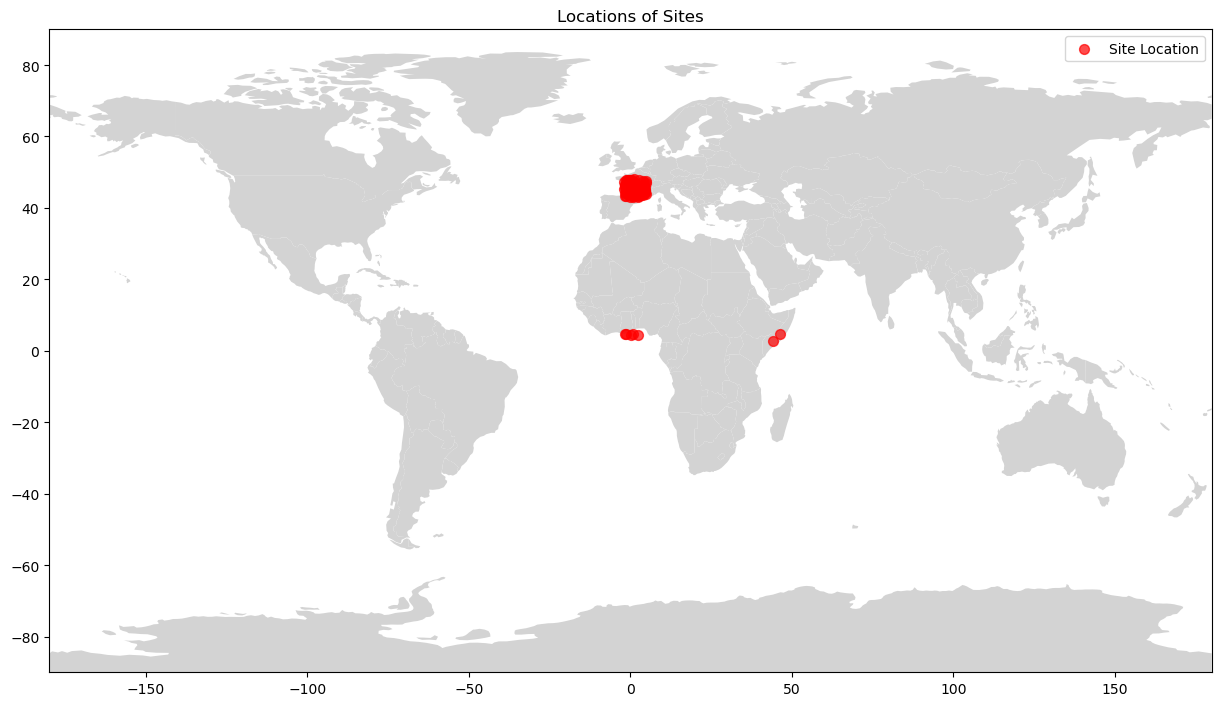

In [ ]:
# Code here

with engine.connect() as conn:
    result = conn.execute(sa.text("SELECT name, latitude, longitude FROM sites")).fetchall()
    sites_df = pd.DataFrame(result, columns=['name', 'latitude', 'longitude'])


sites_df = sites_df.dropna(subset=['latitude', 'longitude'])

#after checking some longitudes and latitudes, we decide to rescale them
scaling_factor = 1e6
sites_df['latitude'] = sites_df['latitude'] / scaling_factor
sites_df['longitude'] = sites_df['longitude'] / scaling_factor

# Ensure lat/lon are within valid bounds
sites_df = sites_df[(sites_df['latitude'] >= -90) & (sites_df['latitude'] <= 90)]
sites_df = sites_df[(sites_df['longitude'] >= -180) & (sites_df['longitude'] <= 180)]


sites_gdf = gpd.GeoDataFrame(
    sites_df,
    geometry=[Point(xy) for xy in zip(sites_df.longitude, sites_df.latitude)],
    crs="EPSG:4326"  # WGS84 Latitude/Longitude
)

# Convert to latitude/longitude CRS (WGS84)
sites_gdf = sites_gdf.to_crs("EPSG:4326")

# Drop the original geometry column if no longer needed
sites_gdf = sites_gdf.drop(columns=["latitude", "longitude"])

# Load a world map
world = gpd.read_file("C:/Users/user/Documents/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
if world.crs != "EPSG:4326":
    world = world.to_crs("EPSG:4326")

# Plot the map and the sites
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color="lightgrey")  # Base map

ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
ax.set_aspect('auto')

# Plot the site locations
sites_gdf.plot(ax=ax, color="red", markersize=50, label="Site Location", alpha=0.7)

# Customize the map
plt.title("Locations of Sites")
plt.legend()
plt.show()


### Question 3:
- Get me sites that have timeseries configured. 
- which site has contract defined ?

In [ ]:
# Code here
#extract sites that have time series
with engine.connect() as conn:
        result = conn.execute(sa.text("""SELECT DISTINCT name
                                       FROM  sites AS S 
                                      JOIN timeseries_records AS T 
                                      ON S.id = T.site_id  """)).fetchall()
        df_site_with_time_series = pd.DataFrame(result)

In [61]:
df_site_with_time_series

,name
0,Barrage Mont Sunny
1,Energy for the Brave
2,Mont Venteux
3,Reservoir Dogs Energy
4,Village Solaire


In [ ]:
# extract sites with contracts
with engine.connect() as conn:
        result = conn.execute(sa.text("""SELECT DISTINCT name
                                       FROM  sites AS S 
                                      JOIN contracts AS C 
                                      ON S.id = C.site_id  """)).fetchall()
        df_site_with_contract = pd.DataFrame(result)

In [64]:
df_site_with_contract

,name
0,GigaWatt Llama Ranch
1,Sunny Side of the Moon
2,River Dance Powerhouse
3,Turbine Nation Offshore
4,Sunshine & Chill Canopy
5,Watts in the Attic
6,Flow like a River
7,Juicy Biomass Co-op
8,Offshore Avengers
9,Trash into Cash


### Question 4:
Focus on site with contracts

If you were to analyse the contracts, choose one that you would focus to leverage the most k€, why ?

In [ ]:
#select the most leveraging contract
with engine.connect() as conn:
    result = conn.execute(
        sa.text("""
            SELECT C.id, C.purchase_order, C.price, C.invoicing_frequency, S.name
            FROM contracts AS C
            JOIN sites AS S ON C.site_id = S.id
            ORDER BY C.price DESC, C.invoicing_frequency DESC
            LIMIT 1
        """)
    ).fetchone()

print(f"Best contract to leverage: {result}")

Best contract to leverage: (13, 'PO-6344-13', 39100.0, 'Monthly', 'Windy Wizards')


I chose this contract to focus on based on the mode of acquisition (monthly) and of course the amount

### Question 5:
Timeseries : 
- Could you plot monthly production & financial report for the sites that have timeseries ?

In [ ]:
# Code here
# Raw time series extraction
with engine.connect() as conn:
    result = conn.execute(sa.text("""SELECT site_id, timestamp, production
                         FROM timeseries_records
                         ORDER BY site_id""")
                 )
    Time_series = pd.DataFrame(result)

In [76]:
print(Time_series)

    site_id                   timestamp  production
0        14  2023-01-01 00:00:00.000000   1066968.0
1        14  2023-07-01 00:00:00.000000   1017912.0
2        14  2024-01-01 00:00:00.000000    821688.0
3        15  2023-01-01 00:00:00.000000   1639872.0
4        15  2023-04-01 00:00:00.000000   1802808.0
..      ...                         ...         ...
68       99  2024-05-01 00:00:00.000000     28543.0
69       99  2024-06-01 00:00:00.000000     45333.0
70       99  2024-07-01 00:00:00.000000   4645793.0
71       99  2024-08-01 00:00:00.000000    426466.0
72       99  2024-09-01 00:00:00.000000     60444.0

[73 rows x 3 columns]


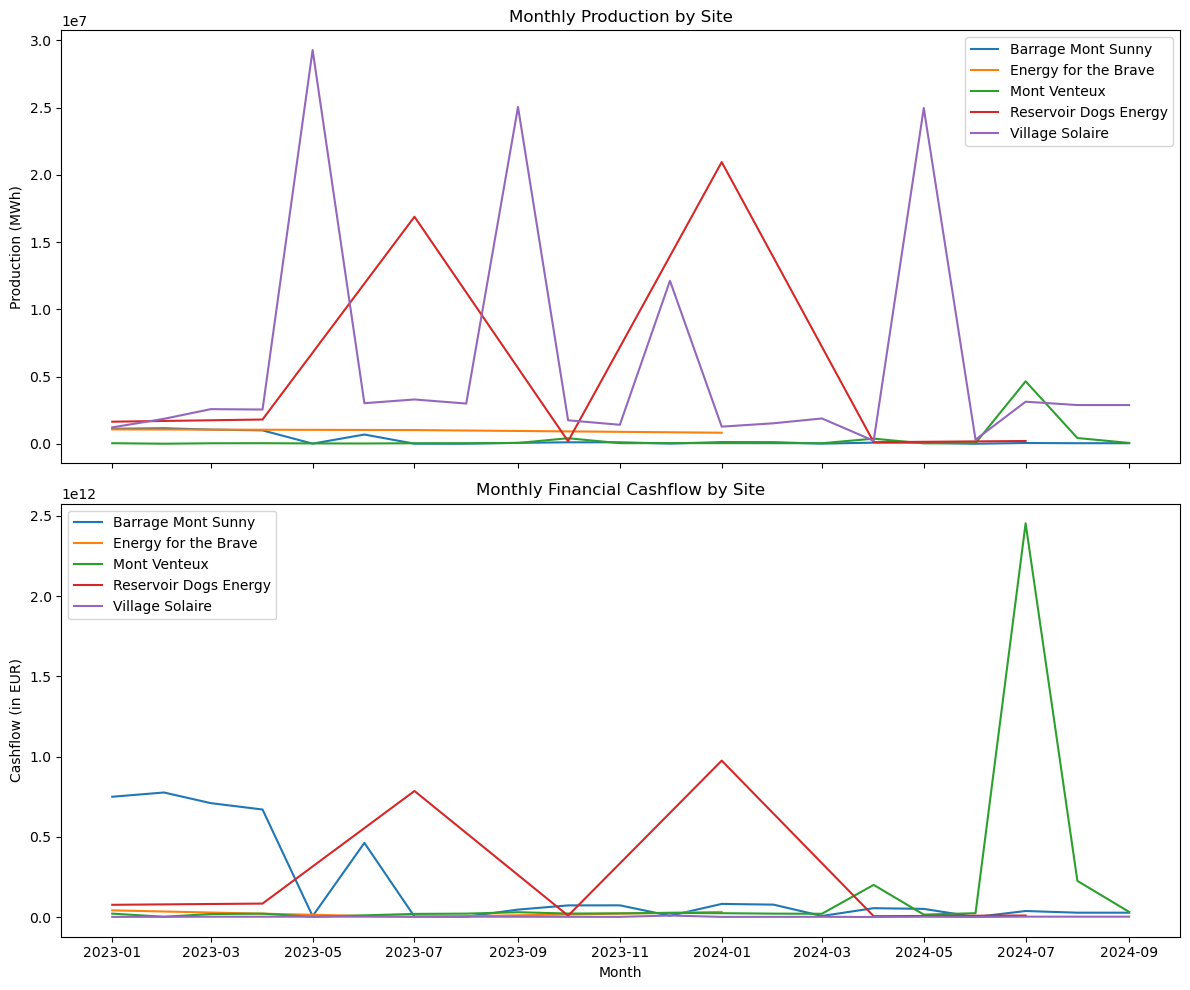

In [ ]:

#Query the timeseries records for production and cashflow data
with engine.connect() as conn:
    result = conn.execute(
        sa.text("""
            SELECT T.site_id, S.name, T.timestamp, T.production, T.unit_production, 
                   T.cashflow, T.unit_cashflow
            FROM timeseries_records AS T
            JOIN sites AS S ON T.site_id = S.id
        """)
    ).fetchall()

# Convert to DataFrame
timeseries_df = pd.DataFrame(result, columns=['site_id', 'name', 'timestamp', 'production', 'unit_production', 'cashflow', 'unit_cashflow'])
timeseries_df['timestamp'] = pd.to_datetime(timeseries_df['timestamp'])

timeseries_df['cashflow'] = timeseries_df.apply(
    lambda x: x['cashflow'] * 1000 if x['unit_cashflow'] == 'kEUR' else x['cashflow'],
    axis=1
)

# ggregate data by site and month
timeseries_df['month'] = timeseries_df['timestamp'].dt.to_period('M')
monthly_report = timeseries_df.groupby(['name', 'month']).agg({
    'production': 'sum',
    'cashflow': 'sum'
}).reset_index()

# Convert 'month' back to datetime for plotting
monthly_report['month'] = monthly_report['month'].dt.to_timestamp()

# Plot monthly production and financials
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Production plot
for name, data in monthly_report.groupby('name'):
    axes[0].plot(data['month'], data['production'], label=name)
axes[0].set_title("Monthly Production by Site")
axes[0].set_ylabel("Production (MWh)")
axes[0].legend()

# Cashflow plot
for name, data in monthly_report.groupby('name'):
    axes[1].plot(data['month'], data['cashflow'], label=name)
axes[1].set_title("Monthly Financial Cashflow by Site")
axes[1].set_ylabel("Cashflow (in EUR)")
axes[1].legend()

plt.xlabel("Month")
plt.tight_layout()
plt.show()
